<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/NLP/Example_Text_Mining_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tokenizing input text

lines = [
'How to tokenize?\nLike a boss.',
'Google is accessible via http://www.google.com',
'1000 new followers! #TwitterFamous']

# Tokenizing with string split
for line in lines:
  print(line.split())

['How', 'to', 'tokenize?', 'Like', 'a', 'boss.']
['Google', 'is', 'accessible', 'via', 'http://www.google.com']
['1000', 'new', 'followers!', '#TwitterFamous']


In [2]:
# Tokenizing using regular expressions
import re

# "\w+", refers to any sequence of one or more alphanumeric characters or underscores.
_token_pattern = r"\w+"
token_pattern = re.compile(_token_pattern)

for line in lines:
  print(token_pattern.findall(line))

['How', 'to', 'tokenize', 'Like', 'a', 'boss']
['Google', 'is', 'accessible', 'via', 'http', 'www', 'google', 'com']
['1000', 'new', 'followers', 'TwitterFamous']


In [3]:
# Using placeholders before tokenizing
def tokenizer(line):
  line = line.lower()
  line = re.sub(r'http[s]?://[\w\/\-\.?]+','_url_',line)
  line = re.sub(r'#\w+', '_hashtag_', line)
  line = re.sub(r'\d+', '_num_', line)
  return token_pattern.findall(line)

for line in lines:
  print(tokenizer(line))

['how', 'to', 'tokenize', 'like', 'a', 'boss']
['google', 'is', 'accessible', 'via', '_url_']
['_num_', 'new', 'followers', '_hashtag_']


In [16]:
# Vectorization
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vec = CountVectorizer(lowercase=True, tokenizer=tokenizer)
x = vec.fit_transform(lines)
pd.DataFrame(x.todense(),columns=vec.get_feature_names_out())

,_hashtag_,_num_,_url_,a,accessible,boss,followers,google,how,is,like,new,to,tokenize,via
0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [17]:
# Limitation of bag of words method
flight_delayed_lines = [
'Flight was delayed, I am not happy',
'Flight was not delayed, I am happy']

x1 = vec.fit_transform(flight_delayed_lines)
pd.DataFrame(x1.todense(),columns=vec.get_feature_names_out())


,am,delayed,flight,happy,i,not,was
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1


In [15]:
# N-grams
vec = CountVectorizer(ngram_range=(2,2)) # bigrams only
x2 = vec.fit_transform(flight_delayed_lines)
pd.DataFrame(x2.todense(),columns=vec.get_feature_names_out())

,am happy,am not,delayed am,flight was,not delayed,not happy,was delayed,was not
0,0,1,1,1,0,1,1,0
1,1,0,1,1,1,0,0,1


In [18]:
# Vectorization based on characters

vec = CountVectorizer(analyzer='char', ngram_range=(4,4))
x3 = vec.fit_transform(flight_delayed_lines)
pd.DataFrame(x3.todense(),columns=vec.get_feature_names_out())

,am,del,hap,i a,not,was,", i",am h,am n,appy,as d,as n,ayed,"d, i",dela,"ed,",elay,flig,ght,happ,ht w,i am,ight,laye,ligh,m ha,m no,not,ot d,ot h,s de,s no,t de,t ha,t wa,was,"yed,"
0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1


In [19]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

lines_fruits = [
'I like apples',
'I like oranges',
'I like pears']

vec = TfidfVectorizer(token_pattern=r'\w+')
x = vec.fit_transform(lines_fruits)
pd.DataFrame(x.todense(),columns=vec.get_feature_names_out())

,apples,i,like,oranges,pears
0,0.767495,0.453295,0.453295,0.000000,0.000000
1,0.000000,0.453295,0.453295,0.767495,0.000000
2,0.000000,0.453295,0.453295,0.000000,0.767495


In [ ]:
!python -m spacy download en_core_web_lg

In [6]:
import spacy

nlp = spacy.load('en_core_web_lg')
terms = ['I','like','apples','oranges','pears']
vectors = [nlp(term).vector.tolist() for term in terms]

In [7]:
import pandas as pd

pd.Series(vectors[terms.index('apples')]).rename('apples')

0     -0.633400
1      0.189810
2     -0.535440
3     -0.526580
4     -0.300010
         ...   
295    0.068773
296   -0.238810
297   -1.178400
298    0.255040
299    0.611710
Name: apples, Length: 300, dtype: float64

In [8]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

cm = sns.light_palette("Gray", as_cmap=True)

pd.DataFrame(cosine_similarity(vectors),index=terms,columns=terms).round(3).style.background_gradient(cmap=cm)

,I,like,apples,oranges,pears
I,1.000000,0.555000,0.204000,0.188000,0.119000
like,0.555000,1.000000,0.330000,0.277000,0.190000
apples,0.204000,0.330000,1.000000,0.778000,0.839000
oranges,0.188000,0.277000,0.778000,1.000000,0.776000
pears,0.119000,0.190000,0.839000,0.776000,1.000000


In [3]:
# Analysis of the movie comment sentiment dataset by Dimitrios et al.
import os
import requests
import zipfile
from io import BytesIO

data_dir = f'{os.getcwd()}/sample_data'
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
response = requests.get(url)

with zipfile.ZipFile(file=BytesIO(response.content), mode='r') as compressed_file:
  compressed_file.extractall(data_dir)

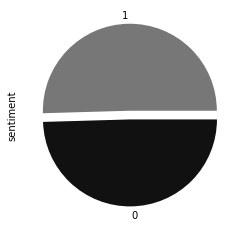

In [9]:
df_list = []

for csv_file in ['imdb_labelled.txt', 'yelp_labelled.txt', 'amazon_cells_labelled.txt']:
  csv_file_with_path = f'{data_dir}/sentiment labelled sentences/{csv_file}'
  temp_df = pd.read_csv(csv_file_with_path,sep='\t',header=0,names=['text','sentiment'])
  df_list.append(temp_df)

df = pd.concat(df_list)

explode = [0.05,0.05]
colors = ['#777777','#111111']
df['sentiment'].value_counts().plot(kind='pie',colors=colors,explode=explode)

In [10]:
pd.options.display.max_colwidth = 90
df[['text','sentiment']].sample(5, random_state=42)

,text,sentiment
471,This is a stunning movie.,1
278,I had the mac salad and it was pretty bland so I will not be getting that again.,0
20,"The food, amazing.",1
150,"Audio Quality is poor, very poor.",0
430,His acting alongside Olivia De Havilland was brilliant and the ending was fantastic!,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

df_train, df_test = train_test_split(df, test_size=0.4, random_state=42)
y_train = df_train['sentiment']
y_test = df_test['sentiment']

vec = CountVectorizer(ngram_features=(1,3), min_df=3, strip_accents='ascii')
x_train = vec.fit_transform(df_train['text'])
x_test = vec.transform(df_test['text'])

clf = MultinomialNB(fit_prior=True)
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)